#  **<font color="red">Ciência dos Dados</font>**

Link: [confusion matrix](https://www.youtube.com/watch?v=s4HlDv1AhgU&t=14s)


A <font color="red">Matriz de Confusão</font> é uma das métricas de avaliação do desempenho das máquinas preditivas que fornece uma visão holística do desempenho do seu modelo.

É utilizado em **aprendizado supervisionado**, ou seja em modelos de classificação: KNN, Naive Bayes, SVM, Decision trees e Logistic regression.   


In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline


**Exemplo:** suponhamos que temos um conjunto de Dados de classificação com $1000$ registros...
Suponha, também, que calculamos a nossa matriz de confusão :

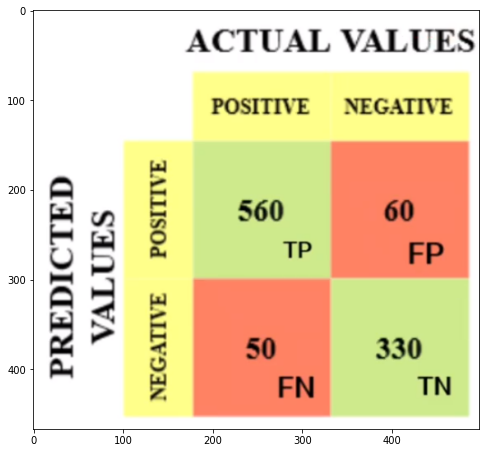

In [2]:
plt.figure(figsize=(8, 8))
#imagem = imread('C:/Users/eddyc/Desktop/REGRESSAO/minions.jpg')
imagem = imread('exemploconfusion.png')
plt.imshow(imagem)
plt.show()

Para medir a **assertividade** da máquina preditiva o <font color="blue">Python</font> faz o seguinte cálculo:

   $accuracy  ~~=~~  \frac{ TP  ~~+~~  TN }{ TP  ~~+~~  FP  ~~+~~  TN  ~~+~~  FN }$
      

Vamos ver outro exemplo com a mesma quantidade de Dados e ver como **INTERPRETAMOS** a matriz de confusion.

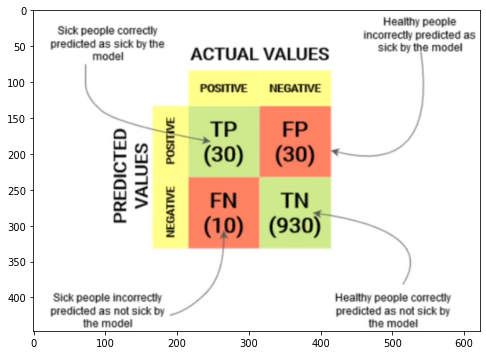

In [3]:
plt.figure(figsize=(8, 8))
#imagem = imread('C:/Users/eddyc/Desktop/REGRESSAO/minions.jpg')
imagem = imread('exemploconfusion2.png')
plt.imshow(imagem)
plt.show()

A acurácia para este resultado será:

$Acurácia ~~=~~ \frac{30 ~~+~~ 930}{30 ~~+~~ 930 ~~+~~ 30 ~~+~~ 10} ~~ =~~96\%$


### <font color="red">OBS:</font>

* Nosso modelo está dizendo assim: "posso prever $96\%$" dos doentes.

* Mas, <font color="blue">NA VERDADE</font>, o que ele deveria dizer é:
   **"posso prever $96\%$ das pessoas que não ficarão doentes"**
*  Neste exemplo anterior a nossa classe está **desbalançeada**.



Vamos entender como usar outras métricas para obtermos uma análise mais fiel ao objetivo de negócio: 

\begin{eqnarray}
Precision  ~~ = ~~  \frac{TP}{TP ~~ + ~~  FP}\\
Recall  ~~ = ~~  \frac{TP}{TP~~~ + ~~ FN}\\
F1-score ~~ = ~~ \frac{2}{\frac{1}{Recall} ~~~ + ~~ \frac{1}{Precision}}
\end{eqnarray}

Se você quer avaliar **FP** você usa Precision, se você quer avaliar **FN** usa o Recall e se você não entende das métricas anteriores usa **F1-score** que é a média harmônica das anteriores.

## Ciência dos Dados na prática

#### <font color="red">Detecção de Parkinson</font>


Neste projeto de aprendizado de máquina com Python, aprenderemos a detectar a presença de **doença de Parkinson** em indivíduos usando vários fatores, variáveis, atributos... Usaremos um <font color="blue">XGBClassifier do XGBoost</font> (**algoritmo de classificação**) como algoritmo de Machine Learning.  


Click aqui para os [Dados de Parkinson](https://archive.ics.uci.edu/ml/datasets/Parkinsons)


Este conjunto de Dados é composto por uma gama de medições biomédicas de voz de $31$ pessoas, $23$ com doença de Parkinson (DP). cada coluna da tabela é uma medida de voz particular, e cada linha corresponde a uma de $195$ vozes registro dessas pessoas (coluna "nome"). O objetivo principal dos Dados é discriminar pessoas saudáveis daquelas com DP, de acordo com o "status" coluna que é definida como $0$ para integra e $1$ para portador de Parkinson. 

# <font color="red">1° Entendemos o problema de negócio</font>

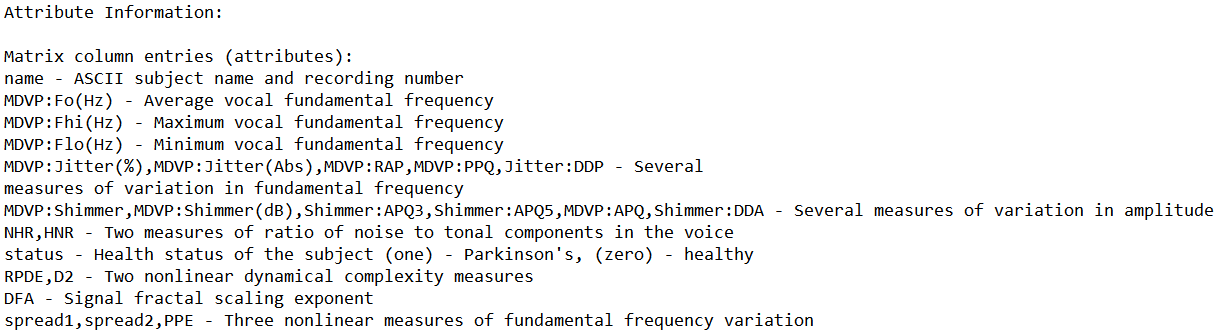

In [4]:
# Arquitetura dos Dados

from PIL import Image
%matplotlib inline
im = Image.open("AD_foto.png")
im.show()
im



In [5]:
# Importação de bibliotecas

import numpy as np 
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




In [6]:
# Conectando com os Dados
df = pd.read_csv("parkinsons.data")


# <font color="red">2° Análise exploratória de Dados</font>

In [7]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [9]:
# Vamos ver se tem valores missing

df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [10]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [11]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

# <font color="red">3° Pré-processamento de Dados</font>

In [12]:
# Separando as variáveis explicativas e a variável a ser predita (o Target, a Label, ... etc) 

features = df.loc[:, df.columns!='status'].values[:,1:] # Todas menos a variável "status"
labels = df.loc[:,'status'].values


In [13]:
# Fazendo estatística da variável Label
# 147 --> Que tem label 1  e 48 --> que tem label 0.

print(labels[labels==1].shape[0], labels[labels==0].shape[0])


147 48


In [14]:
# O algoritmo requer dados na mesma escala. Vamos escalonar os Dados com o MinmaxScaler
scaler = MinMaxScaler((-1, 1))
x = scaler.fit_transform(features)
y = labels



In [15]:
# Separando os Dados de Treino e Teste

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=7) 


# <font color="red">4° Construção da máquina preditiva</font>

In [16]:
# Modelagem - Treinando o modelo CLASSIFICADOR 

model = XGBClassifier()
model.fit(x_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# <font color="red">5° Avaliação da máquina preditiva</font>

In [24]:
# Avaliando o Modelo

y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)


94.87179487179486


isso nos dá uma precisão de $94.87\%$, o que é ótimo considerando o número de linhas de código neste projeto Python.


Você também pode manipular os <font color="blue">hiperparâmetros</font> para tentar aumentar a accuracy.

### <font color="orange">OBS:</font>

* A pergunta que nos fizimos atrâs: <font color="violet">A nossa máquina preditiva está detectando o $94.87\%$ das doenças?</font>... **NÃO**, a gente não pode só olhar a acurácia. 

Vamos olhar a **matriz de confusão**:

* $acurácia = \frac{5 ~~ + ~~ 32}{5 ~~ + ~~ 32 ~~ + ~~ 2 ~~ + ~~ 0} ~ =  ~ 94\%$ 


O correto é falar que nosso modelo vai asertar $94\%$ dos que **não terão parkinson**.


Também: 

* $Recall ~~ = ~~ \frac{5}{5 ~~ + ~~ 0} = 100\%$


* $Precision ~~ = ~~ \frac{5}{5 ~~ + ~~ 2}$ = 71.43\%

In [25]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))


[[ 5  2]
 [ 0 32]]


In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# 0 --> que não ia ter doença
# 1 --> que tem doença

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39

